In [1]:
#import the libraries need to assist with the data analysis 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression # linear regression model
from sklearn.model_selection import train_test_split # for splitting the data into training and testing sets
from sklearn.metrics import r2_score # for comparing the predicted and test values

In [2]:
#import the data 
house_rental = pd.read_csv('malaysia_house_rental_price_data.csv')

# Identify empty data
empty_data = house_rental.isnull().sum()

#print out empty data
print(empty_data)

prop_name                1063
completion_year          9274
monthly_rent              117
property_type             117
rooms                     124
parking                  5800
bathroom                  122
size                      117
furnished                 120
facilities               2323
additional_facilities    6046
city                      117
area                      117
dtype: int64


In [3]:
#Check the information about the dataset
house_rental.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19990 entries, 0 to 19989
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   prop_name              18927 non-null  object 
 1   completion_year        10716 non-null  float64
 2   monthly_rent           19873 non-null  float64
 3   property_type          19873 non-null  object 
 4   rooms                  19866 non-null  float64
 5   parking                14190 non-null  float64
 6   bathroom               19868 non-null  float64
 7   size                   19873 non-null  float64
 8   furnished              19870 non-null  object 
 9   facilities             17667 non-null  object 
 10  additional_facilities  13944 non-null  object 
 11  city                   19873 non-null  object 
 12  area                   19873 non-null  object 
dtypes: float64(6), object(7)
memory usage: 2.0+ MB


In [4]:
# Remove rows with any empty values
house_rental_cleaned = house_rental.dropna()
house_rental_cleaned.head()

,prop_name,completion_year,monthly_rent,property_type,rooms,parking,bathroom,size,furnished,facilities,additional_facilities,city,area
0,The Hipster @ Taman Desa,2022.0,4200.0,Condominium,5.0,2.0,6.0,1842.0,Fully Furnished,"Minimart, Gymnasium, Security, Playground, Swi...","Air-Cond, Cooking Allowed, Washing Machine",Kuala Lumpur,Taman Desa
3,Sentul Point Suite Apartment,2020.0,1700.0,Apartment,2.0,1.0,2.0,743.0,Partially Furnished,"Parking, Playground, Swimming Pool, Squash Cou...","Cooking Allowed, Near KTM/LRT, Washing Machine",Kuala Lumpur,Sentul
7,Arte Plus Jalan Ampang,2018.0,1550.0,Service Residence,1.0,1.0,1.0,700.0,Fully Furnished,"Parking, Gymnasium, Playground, Security, Lift...","Air-Cond, Cooking Allowed, Near KTM/LRT, Washi...",Kuala Lumpur,Ampang
8,Nova I,2014.0,1400.0,Apartment,2.0,1.0,1.0,750.0,Fully Furnished,"Playground, Security, Parking, Lift, Swimming ...","Air-Cond, Cooking Allowed, Washing Machine, Ne...",Kuala Lumpur,Segambut
11,PV9 Residences @ Taman Melati,2022.0,2000.0,Service Residence,4.0,2.0,2.0,1100.0,Partially Furnished,"Parking, Security, Lift, Swimming Pool, Playgr...","Air-Cond, Cooking Allowed, Near KTM/LRT, Washi...",Kuala Lumpur,Setapak


In [5]:
#Check the info about the cleaned dataset
house_rental_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5979 entries, 0 to 19989
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   prop_name              5979 non-null   object 
 1   completion_year        5979 non-null   float64
 2   monthly_rent           5979 non-null   float64
 3   property_type          5979 non-null   object 
 4   rooms                  5979 non-null   float64
 5   parking                5979 non-null   float64
 6   bathroom               5979 non-null   float64
 7   size                   5979 non-null   float64
 8   furnished              5979 non-null   object 
 9   facilities             5979 non-null   object 
 10  additional_facilities  5979 non-null   object 
 11  city                   5979 non-null   object 
 12  area                   5979 non-null   object 
dtypes: float64(6), object(7)
memory usage: 654.0+ KB


In [6]:
#Find out about the different property types in the dataset
property_type = house_rental_cleaned['property_type']
property_type_list = property_type.tolist()
property_type_list_merged = list(set(property_type_list))
print(property_type_list_merged)

['Townhouse Condo', 'Apartment', 'Duplex', 'Condominium', 'Others', 'Service Residence', 'Studio', 'Flat']


In [7]:
#Count the number of occurrences of each property type
property_counts = house_rental_cleaned['property_type'].value_counts()
print(property_counts)

property_type
Condominium          2885
Service Residence    2221
Apartment             771
Studio                 64
Duplex                 20
Others                 13
Townhouse Condo         3
Flat                    2
Name: count, dtype: int64


In [8]:
#Change the property counts into a list 
property_counts_list = property_counts.tolist()

#Flip the order of the property counts list
property_counts_list.reverse()
property_counts_list

[2, 3, 13, 20, 64, 771, 2221, 2885]

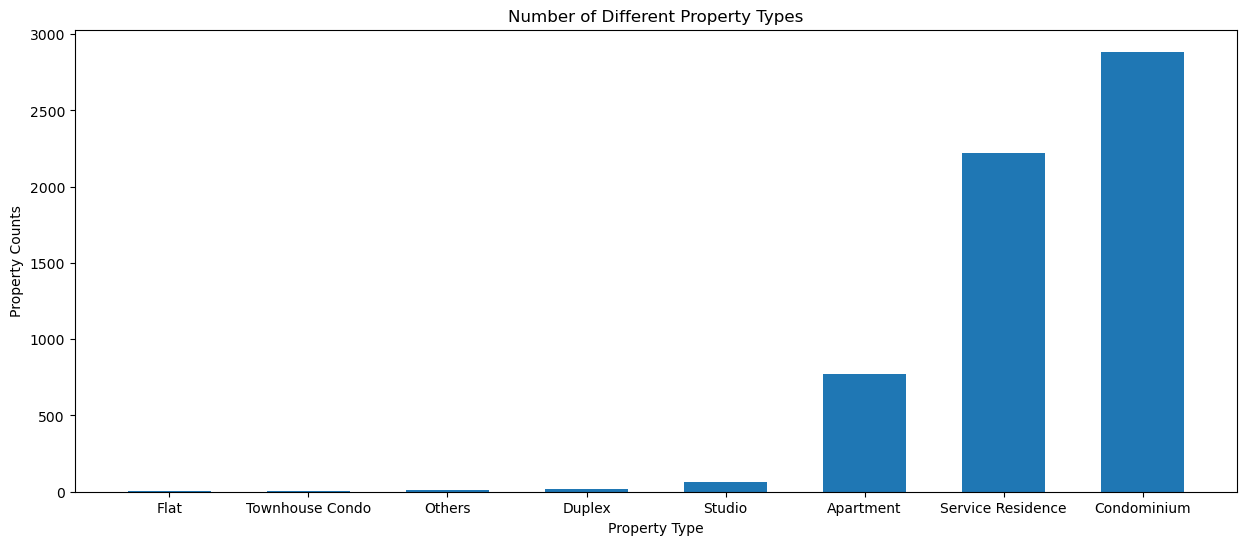

In [9]:
#Bar plot 
x = ['Flat', 'Townhouse Condo', 'Others', 'Duplex', 'Studio', 'Apartment', 'Service Residence', 'Condominium']
y = property_counts_list

plt.figure(figsize=(15,6))
plt.bar(x,y, width =0.6)
plt.xlabel('Property Type')
plt.ylabel('Property Counts')
plt.title('Number of Different Property Types')
plt.show()

In [10]:
# Convert the list of dictionaries to a DataFrame
x = ['Flat', 'Townhouse Condo', 'Others', 'Duplex', 'Studio', 'Apartment', 'Service Residence', 'Condominium']

house_rental_cleaned.head()

,prop_name,completion_year,monthly_rent,property_type,rooms,parking,bathroom,size,furnished,facilities,additional_facilities,city,area
0,The Hipster @ Taman Desa,2022.0,4200.0,Condominium,5.0,2.0,6.0,1842.0,Fully Furnished,"Minimart, Gymnasium, Security, Playground, Swi...","Air-Cond, Cooking Allowed, Washing Machine",Kuala Lumpur,Taman Desa
3,Sentul Point Suite Apartment,2020.0,1700.0,Apartment,2.0,1.0,2.0,743.0,Partially Furnished,"Parking, Playground, Swimming Pool, Squash Cou...","Cooking Allowed, Near KTM/LRT, Washing Machine",Kuala Lumpur,Sentul
7,Arte Plus Jalan Ampang,2018.0,1550.0,Service Residence,1.0,1.0,1.0,700.0,Fully Furnished,"Parking, Gymnasium, Playground, Security, Lift...","Air-Cond, Cooking Allowed, Near KTM/LRT, Washi...",Kuala Lumpur,Ampang
8,Nova I,2014.0,1400.0,Apartment,2.0,1.0,1.0,750.0,Fully Furnished,"Playground, Security, Parking, Lift, Swimming ...","Air-Cond, Cooking Allowed, Washing Machine, Ne...",Kuala Lumpur,Segambut
11,PV9 Residences @ Taman Melati,2022.0,2000.0,Service Residence,4.0,2.0,2.0,1100.0,Partially Furnished,"Parking, Security, Lift, Swimming Pool, Playgr...","Air-Cond, Cooking Allowed, Near KTM/LRT, Washi...",Kuala Lumpur,Setapak


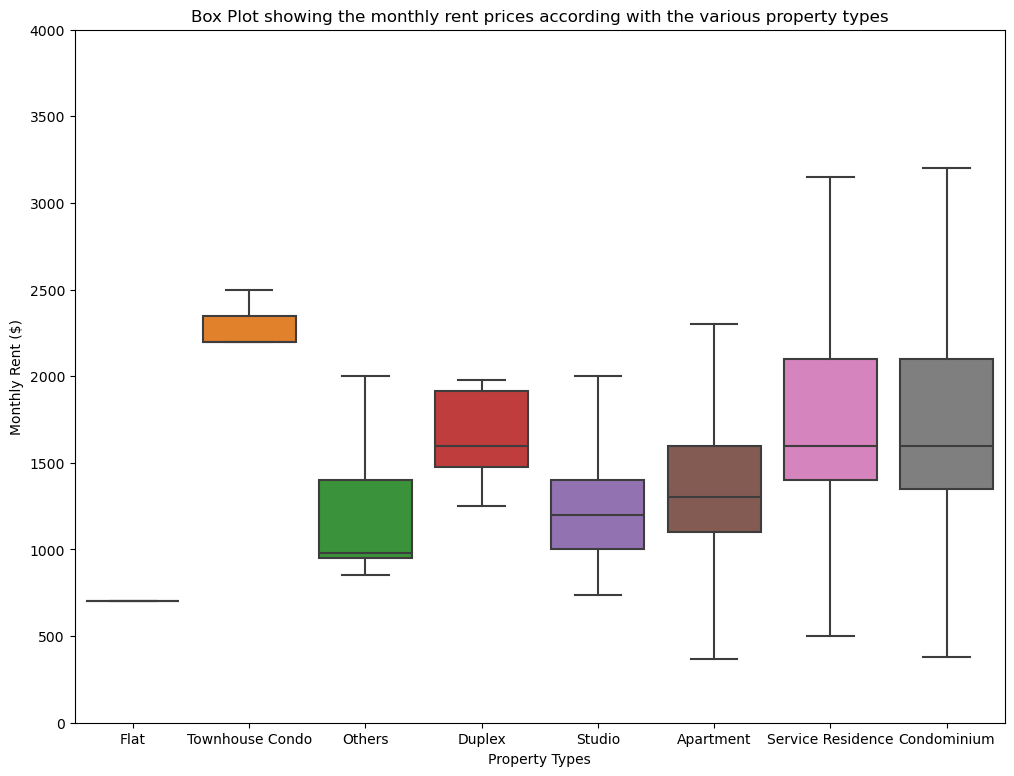

In [11]:
#Show boxplots in a single plot without outliers (If wanna see outliers, just change showfliers=True)
property_types = ['Flat', 'Townhouse Condo', 'Others', 'Duplex', 'Studio', 'Apartment', 'Service Residence', 'Condominium']

# Set the figure size
plt.figure(figsize=(12, 9))  # Adjust width and height as needed

# Create the boxplot (If want to see outliers, just change showfliers=True)
ax = sns.boxplot(data=house_rental_cleaned, x="property_type", y="monthly_rent",order=property_types, showfliers=False)

# Set the y-axis limit
plt.ylim(0, 4000)  # Adjust the limits as needed

#Set the axes names
plt.xlabel("Property Types")
plt.ylabel("Monthly Rent ($)")
plt.title("Box Plot showing the monthly rent prices according with the various property types")

# Show the plot
plt.show()

In [12]:
#Remove outliers form dataset, more than 4000 as all property does not have upper whisker above that.
index_outlier = house_rental_cleaned[house_rental_cleaned["monthly_rent"] > 4000.0].index
house_rental_cleaned = house_rental_cleaned[house_rental_cleaned["monthly_rent"] <= 4000.0].copy()

# Check new length
print(len(house_rental_cleaned))

#To check the new length of dataset after removing outliers
print(len(house_rental_cleaned))

5846
5846


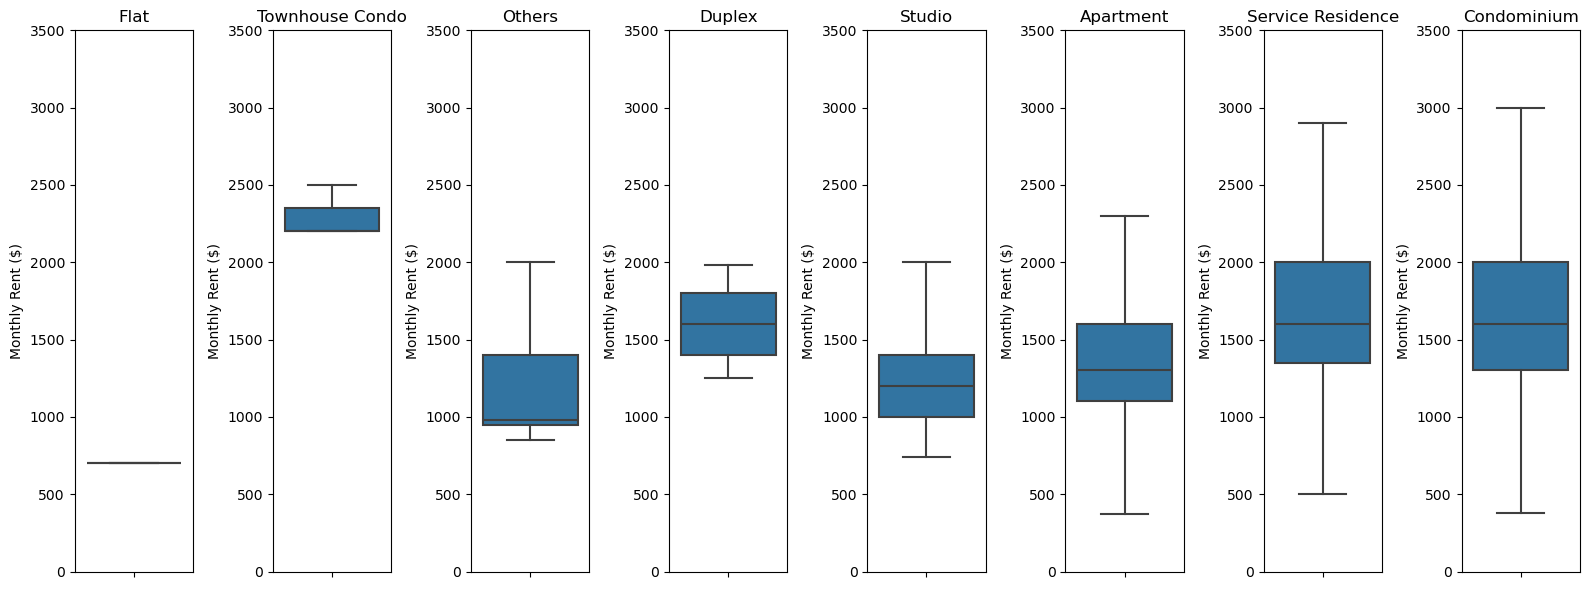

In [13]:
#Show boxplot beside each other in a more concise manner removing all outliers

property_types = ['Flat', 'Townhouse Condo', 'Others', 'Duplex', 'Studio', 'Apartment', 'Service Residence', 'Condominium']

# Create subplots
fig, axes = plt.subplots(1, len(property_types), figsize=(16, 6))  # Adjust figsize as needed

# Iterate over each property and plot the boxplot
for i, property_type in enumerate(property_types):
    sns.boxplot(data=house_rental_cleaned[house_rental_cleaned['property_type'] == property_type], y="monthly_rent", ax=axes[i], showfliers=False)
    axes[i].set_title(property_type)
    
    axes[i].set_ylim(0, 3500) 
    axes[i].set_ylabel('Monthly Rent ($)')
plt.tight_layout()  
plt.show()

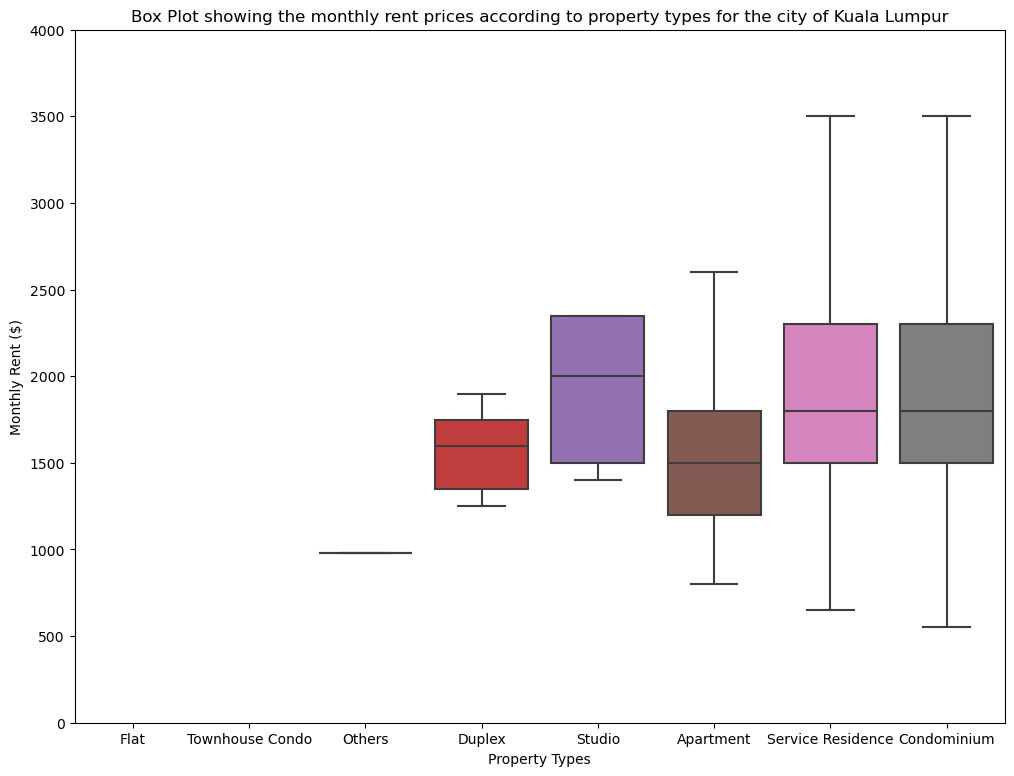

In [14]:
#Show boxplots in a single plot for Kuala Lumpur only
df_cleaned_data = pd.DataFrame(house_rental_cleaned)
KL_data = df_cleaned_data[df_cleaned_data['city'] == 'Kuala Lumpur ']
Selangor_data = df_cleaned_data[df_cleaned_data['city'] == 'Selangor ']

property_types = ['Flat', 'Townhouse Condo', 'Others', 'Duplex', 'Studio', 'Apartment', 'Service Residence', 'Condominium']

# Set figure size
plt.figure(figsize=(12, 9))  

# Create boxplot
ax = sns.boxplot(data=KL_data, x="property_type", y="monthly_rent",order=property_types, showfliers=False)

# y-axis limit
plt.ylim(0, 4000) 

#Set the names for labes
plt.xlabel("Property Types")
plt.ylabel("Monthly Rent ($)")
plt.title("Box Plot showing the monthly rent prices according to property types for the city of Kuala Lumpur")

# Show the plot
plt.show()

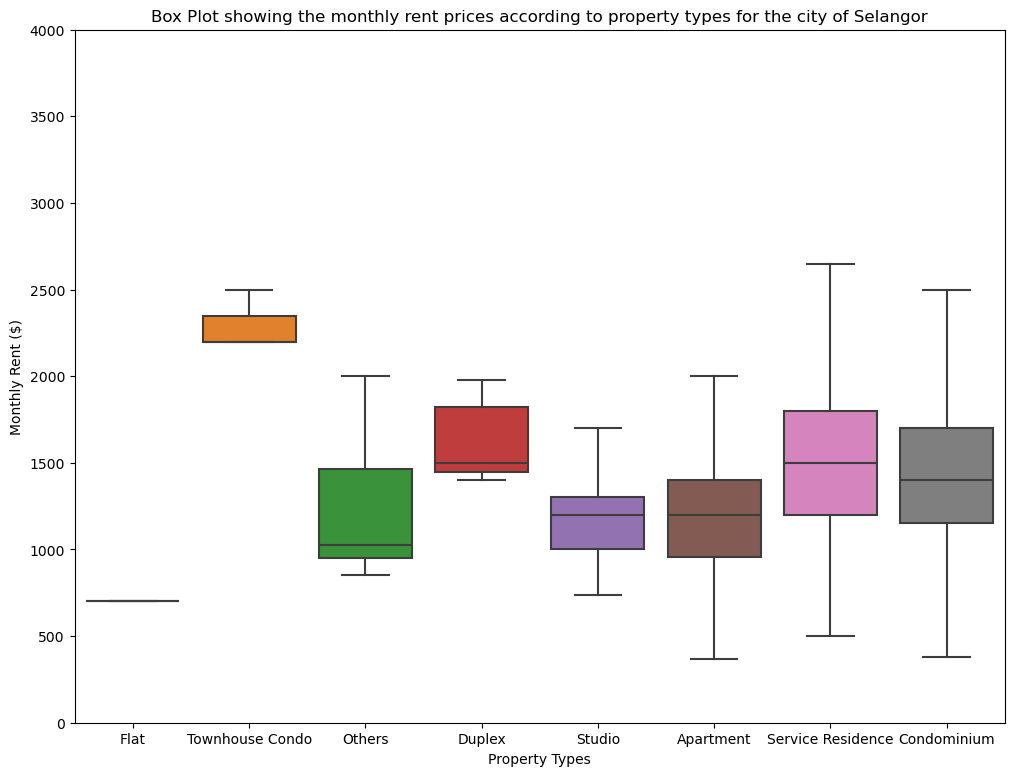

In [15]:
#Show boxplots in a single plot for Selangor only
Selangor_data = df_cleaned_data[df_cleaned_data['city'] == 'Selangor ']
# Set the figure size
plt.figure(figsize=(12, 9))  # Adjust width and height as needed

# Create boxplot
ax = sns.boxplot(data=Selangor_data, x="property_type", y="monthly_rent",order=property_types, showfliers=False)

# Set y-axis 
plt.ylim(0, 4000)  

#create label names
plt.xlabel("Property Types")
plt.ylabel("Monthly Rent ($)")
plt.title("Box Plot showing the monthly rent prices according to property types for the city of Selangor")


plt.show()

In [16]:
#Check the top 10 most popular areas in the dataset
area_type = house_rental_cleaned['area'] 
area_type_list = area_type.tolist() 
area_type_list_merged = list(set(area_type_list))

area_df = pd.DataFrame(house_rental_cleaned, columns=['area']) 
count_sorted = area_df['area'].value_counts().reindex(area_type_list_merged, fill_value=0).sort_values(ascending=False) 
popular_areas = count_sorted.head(10)

print(popular_areas)

area
Cheras            738
Cyberjaya         398
Sentul            340
Kajang            276
Setapak           239
Kepong            233
Shah Alam         224
Puchong           220
Seri Kembangan    201
Ampang            191
Name: count, dtype: int64


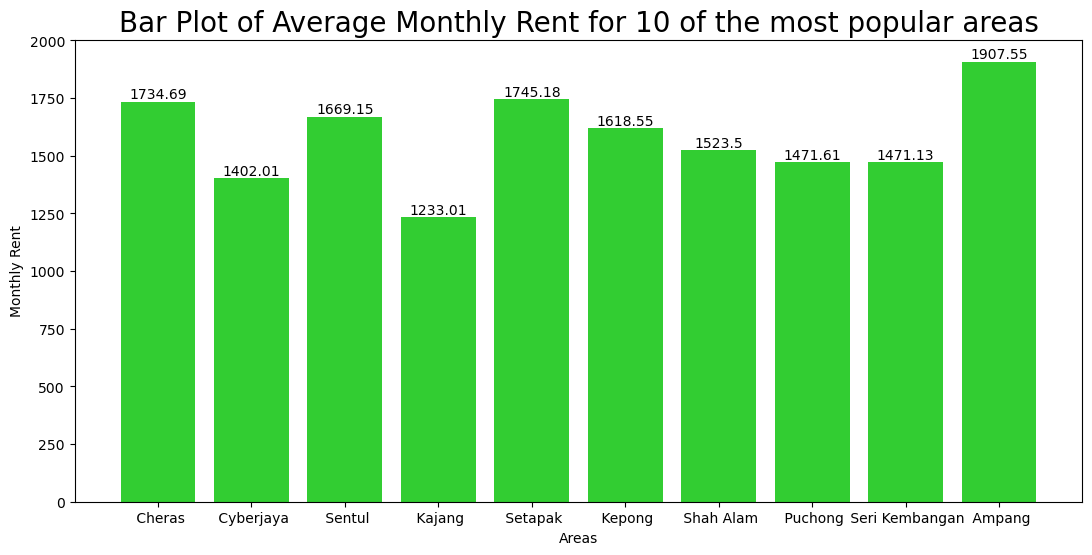

In [17]:
popular_areas_list =(list(popular_areas.keys()))
average_monthly_rent = []

# obtain series
def obtain_series(dataframe,popular_areas_list,variable:str):
    data = dataframe[dataframe['area'].str.contains(popular_areas_list)]
    series = data[variable]
    return series
# calculate the average number of facilities each property type
def average(list):
    return round(sum(list)/len(list),2)
# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center', va='bottom')

# Obtain the list with each property type's average monthly_rent
monthly_rent = []
for x in range(len(popular_areas_list)):
    a = obtain_series(house_rental_cleaned,popular_areas_list[x],'monthly_rent')
    for x in a:
        monthly_rent.append(x)
    average_monthly_rent.append(average(monthly_rent))
    monthly_rent.clear()

# Plot the figure on average monthly rent for each property type
plt.figure(figsize=(13,6))
plt.bar(popular_areas_list, average_monthly_rent,color='limegreen')
addlabels(popular_areas_list, average_monthly_rent)
plt.title("Bar Plot of Average Monthly Rent for 10 of the most popular areas",fontsize=20) 
plt.xlabel("Areas") 
plt.ylabel("Monthly Rent")
plt.show()

In [18]:
medians = house_rental_cleaned.groupby(['property_type'])['monthly_rent'].median().values
category = house_rental_cleaned.groupby(['property_type'])['monthly_rent'].median().index.tolist()


# Calculate quartiles
quartiles = house_rental_cleaned.groupby('property_type')['monthly_rent'].quantile([0.25, 0.75]).unstack()

# Calculate IQR
quartiles['IQR'] = quartiles[0.75] - quartiles[0.25]
IQR = quartiles["IQR"].values

# Calculate upper whisker limit
quartiles['upper_limit'] = quartiles[0.75] + 1.5 * quartiles['IQR']
upper_limit = quartiles["upper_limit"].values

# Calculate lower whisker limit
quartiles['lower_limit'] = quartiles[0.25] - 1.5 * quartiles['IQR']
lower_limit = quartiles['lower_limit'].values

property_df = pd.DataFrame({'Property Type': category,'Median value': medians, "Maximum values" : upper_limit, "Minimum values" : lower_limit, "IQR" : IQR})
property_df

,Property Type,Median value,Maximum values,Minimum values,IQR
0,Apartment,1300.0,2350.0,350.0,500.0
1,Condominium,1600.0,3050.0,250.0,700.0
2,Duplex,1600.0,2400.0,800.0,400.0
3,Flat,700.0,700.0,700.0,0.0
4,Others,980.0,2075.0,275.0,450.0
5,Service Residence,1600.0,2975.0,375.0,650.0
6,Studio,1200.0,2000.0,400.0,400.0
7,Townhouse Condo,2200.0,2575.0,1975.0,150.0


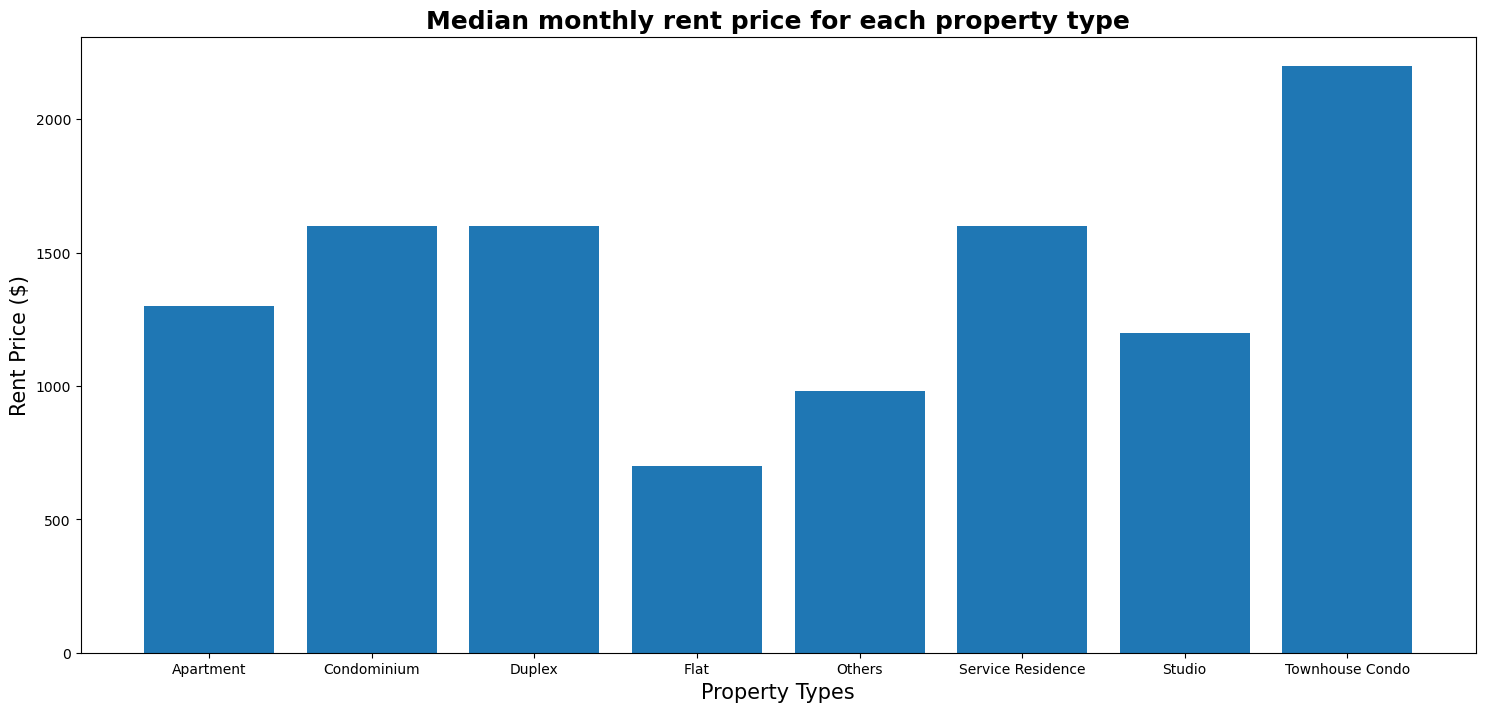

In [19]:
#Bar chart for Median monthly rent price for each property type
plt.figure(figsize=(18, 8))
plt.bar(category, medians)
plt.xlabel("Property Types", fontsize=15)
plt.ylabel("Rent Price ($)", fontsize=15)
plt.title("Median monthly rent price for each property type", fontsize=18, fontweight='bold')
plt.show()

['Flat', 'Townhouse Condo', 'Apartment', 'Others', 'Duplex', 'Service Residence', 'Condominium', 'Studio'] [700.0, 2300.0, 1386.51, 1236.92, 1598.65, 1766.52, 1762.79, 1274.5]


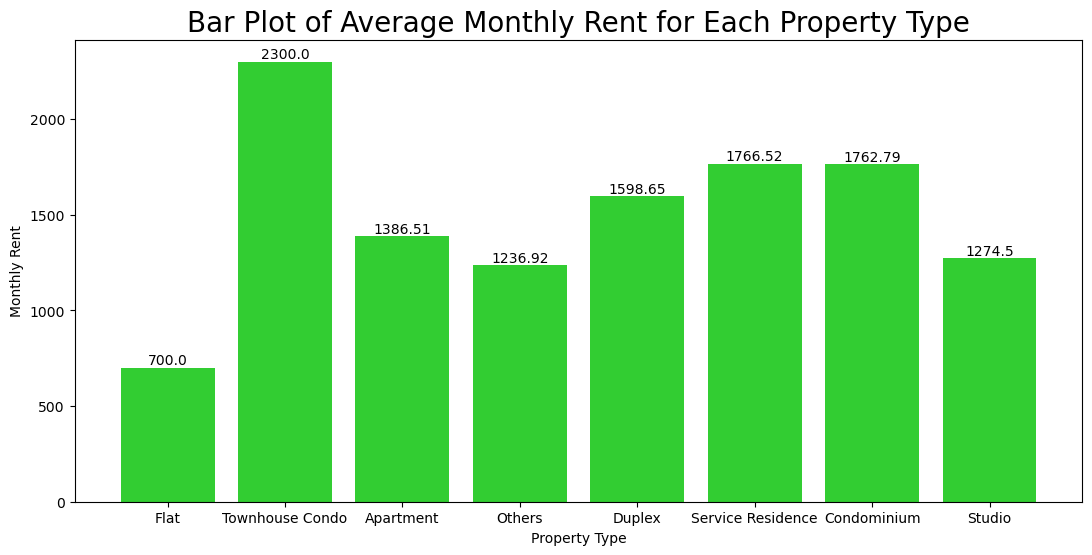

In [20]:
property_type = ['Flat', 'Townhouse Condo', 'Apartment', 'Others', 'Duplex', 'Service Residence', 'Condominium', 'Studio']
average_monthly_rent = []

# obtain series
def obtain_series(dataframe,property_type:str,variable:str):
    data = dataframe[dataframe['property_type'].str.contains(property_type)]
    series = data[variable]
    return series
    
# count the number of facilities each property have
def facilities_number(series):
    list = []
    for x in series:
        list.append(x.count(',')+1)
    return list

# calculate the average 
def average(list):
    return round(sum(list)/len(list),2)

# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center', va='bottom')

# Obtain the list with each property type's average monthly_rent
monthly_rent = []
for x in range(len(property_type)):
    a = obtain_series(house_rental_cleaned,property_type[x],'monthly_rent')
    for x in a:
        monthly_rent.append(x)
    average_monthly_rent.append(average(monthly_rent))
    monthly_rent.clear()

print(property_type,average_monthly_rent)
# Plot the figure on average monthly rent for each property type
plt.figure(figsize=(13,6))
plt.bar(property_type, average_monthly_rent,color='limegreen')
addlabels(property_type, average_monthly_rent)
plt.title("Bar Plot of Average Monthly Rent for Each Property Type",fontsize=20) 
plt.xlabel("Property Type") 
plt.ylabel("Monthly Rent")
plt.show()
 
# Studio has the highest number of facilities, but it is not the one with average highest monthly rent

C:\Users\rushi\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


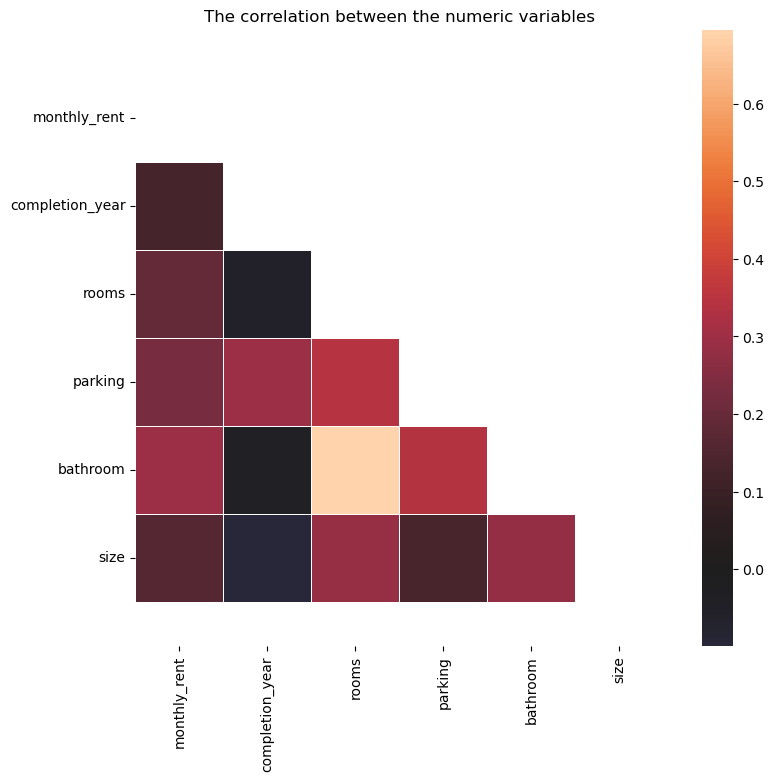

In [21]:
#The correlation between the numeric variables
numeric_columns = ['monthly_rent', 'completion_year', 'rooms', 'parking', 'bathroom', 'size']
corrs = house_rental_cleaned[numeric_columns].corr() # calculate the correlation table
# as this is a symmetric table, set up a mask so that we only plot values below the main diagonal
mask = np.triu(np.ones_like(corrs, dtype=bool)) 
f, ax = plt.subplots(figsize=(10, 8)) # initialise the plots and axes
# plot the correlations as a seaborn heatmap, with a colourbar
sns.heatmap(corrs, mask=mask, center=0, annot=True, square=True, linewidths=.5) 
# do some fiddling so that the top and bottom are not obscured
bottom, top = ax.get_ylim() 
plt.title("The correlation between the numeric variables")
ax.set_ylim(bottom + 0.5, top - 0.5);

In [22]:
#Check the min/max for completion_year
years = house_rental_cleaned['completion_year']
years_list = years.tolist()
all_year_merged = list(set(years_list))

print(min(all_year_merged))
print(max(all_year_merged))

1980.0
2025.0


In [23]:
# Create a copy to avoid modifying the original dataframe
df_years = house_rental_cleaned.copy()

# Subtract 1980 from each value in the completion_year column
df_years['completion_year'] = df_years['completion_year'].apply(lambda x: x - 1980)

df_years.head()

,prop_name,completion_year,monthly_rent,property_type,rooms,parking,bathroom,size,furnished,facilities,additional_facilities,city,area
3,Sentul Point Suite Apartment,40.0,1700.0,Apartment,2.0,1.0,2.0,743.0,Partially Furnished,"Parking, Playground, Swimming Pool, Squash Cou...","Cooking Allowed, Near KTM/LRT, Washing Machine",Kuala Lumpur,Sentul
7,Arte Plus Jalan Ampang,38.0,1550.0,Service Residence,1.0,1.0,1.0,700.0,Fully Furnished,"Parking, Gymnasium, Playground, Security, Lift...","Air-Cond, Cooking Allowed, Near KTM/LRT, Washi...",Kuala Lumpur,Ampang
8,Nova I,34.0,1400.0,Apartment,2.0,1.0,1.0,750.0,Fully Furnished,"Playground, Security, Parking, Lift, Swimming ...","Air-Cond, Cooking Allowed, Washing Machine, Ne...",Kuala Lumpur,Segambut
11,PV9 Residences @ Taman Melati,42.0,2000.0,Service Residence,4.0,2.0,2.0,1100.0,Partially Furnished,"Parking, Security, Lift, Swimming Pool, Playgr...","Air-Cond, Cooking Allowed, Near KTM/LRT, Washi...",Kuala Lumpur,Setapak
12,Arte Plus Jalan Ampang,38.0,1500.0,Service Residence,1.0,1.0,1.0,700.0,Fully Furnished,"Gymnasium, Jogging Track, Playground, Parking,...","Air-Cond, Cooking Allowed, Washing Machine, Ne...",Kuala Lumpur,Ampang


Training score is 0.149
Correlation score is 0.387
Coefficients are [12.776]
Intercept is 1368.553
 
12.78 x + 1369 where x is number of years from 1980


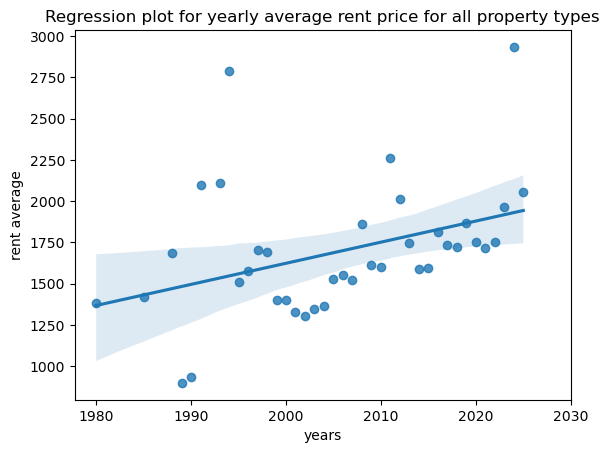

In [24]:
rent_average = []
years = []

#loop to get the average rent for each year from 1980 to 2025 for all property
for index in range(0,46):       
    
    df_property_years = df_years[df_years["completion_year"] == index]

    rent_list = df_property_years["monthly_rent"].tolist()
    if len(rent_list) != 0:
        rent_average.append(sum(rent_list)/len(rent_list))
        years.append(index)

yearly_rent_average = pd.DataFrame({"rent average": rent_average, "years": years})

X = yearly_rent_average[["years"]]
Y = yearly_rent_average["rent average"]

linear = LinearRegression(fit_intercept=True) # instantatiate the linear regression model
linear.fit(X, Y) # fit the data to the model
training_score = linear.score(X, Y) # calculate rsq for the training set

print("Training score is",np.round(training_score, 3))
print("Correlation score is",np.round(np.sqrt(training_score), 3))
print("Coefficients are",np.round(linear.coef_, 3))
print("Intercept is",np.round(linear.intercept_,3))

sns.regplot(x=X, y=Y)
p1 = np.poly1d(np.polyfit(yearly_rent_average["years"], yearly_rent_average["rent average"], 1))
print(p1, "where x is number of years from 1980")


# Get the current tick locations and labels
X_ticks = [0.,10.,20.,30.,40.,50.]
X_labels =  [0.0, 10.0, 20.0, 30.0, 40.0, 50.0]

# Update the tick labels by adding 1980 to each value to make it return back to its original year
#However x is still number of years from 1980
updated_tick_labels = [str(int(x) + 1980) for x in X_labels]
plt.xticks(X_ticks, updated_tick_labels)
plt.title("Regression plot for yearly average rent price for all property types");

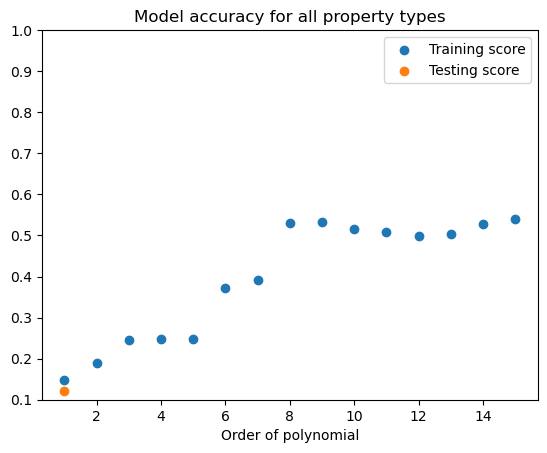

In [25]:
#Create model accuracy of of the training and testing score to obtain the best polynomial order for the equation
X = yearly_rent_average["years"]
Y = yearly_rent_average["rent average"]
# split into a training set with 80% of the data, and a testing set of 20%
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, random_state=42)

training = np.zeros(15)
testing = np.zeros(15)
for ord in range(1,16):
    rng = np.random.RandomState(1)
    reg_ord = ord;
    model = LinearRegression(fit_intercept=True).fit(np.vander(X_train,reg_ord+1),Y_train)
    training[ord-1] = model.score(np.vander(X_train,reg_ord+1),Y_train)
    y_pred = model.predict(np.vander(X_test,reg_ord+1))
    testing[ord-1] = r2_score(Y_test,y_pred)

plt.scatter(range(1,16), training, label='Training score')
plt.scatter(range(1,16), testing, label='Testing score')
plt.legend()
plt.xlabel('Order of polynomial')
plt.ylim((.1, 1.))
plt.title('Model accuracy for all property types');

In [26]:
p1 = np.poly1d(np.polyfit(X, Y, 1))
print(p1)
print("\nThe optimal polynomial order equation for all property types is y = 12.78 x + 1369\nwhere x is the number of years since 1980")

 
12.78 x + 1369

The optimal polynomial order equation for all property types is y = 12.78 x + 1369
where x is the number of years since 1980


Training score is 0.191
Correlation score is 0.437
Coefficients are [-26.999]
Intercept is 2329.568
 
-27 x + 2330 where x is number of years from 1980


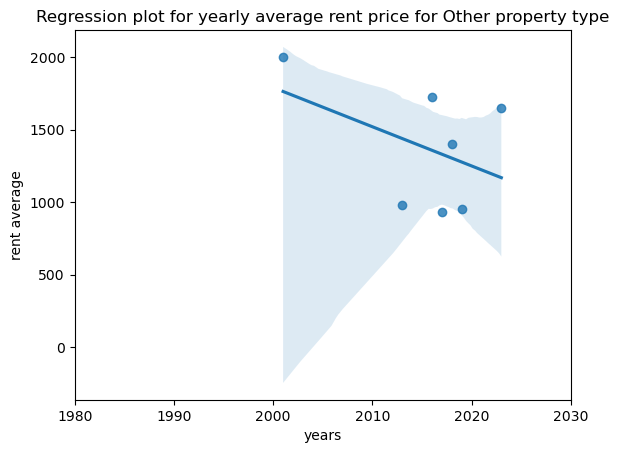

In [27]:
property_types = ['Others', 'Duplex', 'Studio', 'Apartment', 'Service Residence', 'Condominium']
df_specific_property = df_years[df_years["property_type"]=="Others"]

rent_average = []
years = []
for index in range(0,46):
    
    df_property_years = df_specific_property[df_specific_property["completion_year"] == index]

    rent_list = df_property_years["monthly_rent"].tolist()
    if len(rent_list) != 0:
        rent_average.append(sum(rent_list)/len(rent_list))
        years.append(index)

yearly_rent_average = pd.DataFrame({"rent average": rent_average, "years": years})

X = yearly_rent_average[["years"]]
Y = yearly_rent_average["rent average"]

linear = LinearRegression(fit_intercept=True) # instantatiate the linear regression model
linear.fit(X, Y) # fit the data to the model
training_score = linear.score(X, Y) # calculate rsq for the training set

print("Training score is",np.round(training_score, 3))
print("Correlation score is",np.round(np.sqrt(training_score), 3))
print("Coefficients are",np.round(linear.coef_, 3))
print("Intercept is",np.round(linear.intercept_,3))

sns.regplot(x=X, y=Y)
p1 = np.poly1d(np.polyfit(yearly_rent_average["years"], yearly_rent_average["rent average"], 1))
print(p1, "where x is number of years from 1980")

# Get the current tick locations and labels
X_ticks = [0.,10.,20.,30.,40.,50.]
X_labels =  [0.0, 10.0, 20.0, 30.0, 40.0, 50.0]

# Update the tick labels by adding 1980 to each value to make it return back to its original year
#However x is still number of years from 1980
updated_tick_labels = [str(int(x) + 1980) for x in X_labels]
plt.xticks(X_ticks, updated_tick_labels)
plt.title("Regression plot for yearly average rent price for Other property type");

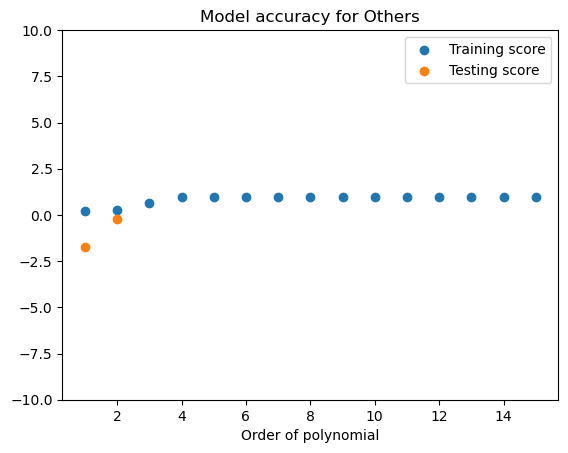

In [28]:
#Create model accuracy of of the training and testing score to obtain the best polynomial order for the equation
X = df_specific_property["completion_year"]
Y = df_specific_property["monthly_rent"]
# split into a training set with 80% of the data, and a testing set of 20%
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, random_state=42)

training = np.zeros(15)
testing = np.zeros(15)
for ord in range(1,16):
    rng = np.random.RandomState(1)
    reg_ord = ord;
    model = LinearRegression(fit_intercept=True).fit(np.vander(X_train,reg_ord+1),Y_train)
    training[ord-1] = model.score(np.vander(X_train,reg_ord+1),Y_train)
    y_pred = model.predict(np.vander(X_test,reg_ord+1))
    testing[ord-1] = r2_score(Y_test,y_pred)

plt.scatter(range(1,16), training, label='Training score')
plt.scatter(range(1,16), testing, label='Testing score')
plt.legend()
plt.xlabel('Order of polynomial')
plt.ylim((-10, 10))
plt.title('Model accuracy for Others');

In [29]:
p2 = np.poly1d(np.polyfit(X, Y, 2))
print(p2)
print("\nThe optimal polynomial order equation for all property types is y = 4.203 x^2 - 299 x + 6446\nwhere x is the number of years since 1980")

       2
4.203 x - 299 x + 6446

The optimal polynomial order equation for all property types is y = 4.203 x^2 - 299 x + 6446
where x is the number of years since 1980


Training score is 0.001
Correlation score is 0.033
Coefficients are [1.804]
Intercept is 1601.103
 
1.804 x + 1601 where x is number of years from 1980


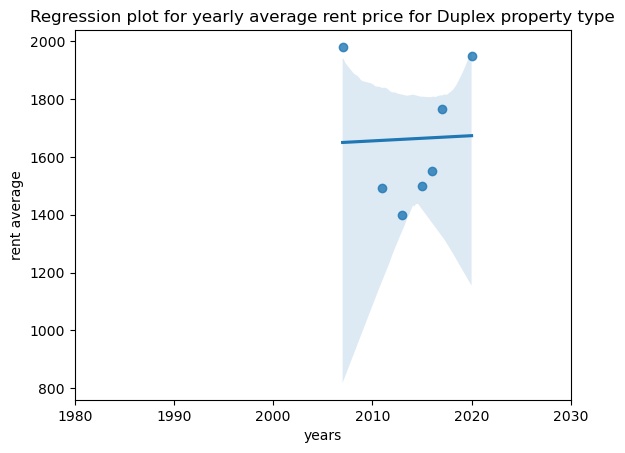

In [30]:
property_types = ['Others', 'Duplex', 'Studio', 'Apartment', 'Service Residence', 'Condominium']
df_specific_property = df_years[df_years["property_type"]=="Duplex"]

rent_average = []
years = []
for index in range(0,46):
    
    df_property_years = df_specific_property[df_specific_property["completion_year"] == index]

    rent_list = df_property_years["monthly_rent"].tolist()
    if len(rent_list) != 0:
        rent_average.append(sum(rent_list)/len(rent_list))
        years.append(index)

yearly_rent_average = pd.DataFrame({"rent average": rent_average, "years": years})

X = yearly_rent_average[["years"]]
Y = yearly_rent_average["rent average"]

linear = LinearRegression(fit_intercept=True) # instantatiate the linear regression model
linear.fit(X, Y) # fit the data to the model
training_score = linear.score(X, Y) # calculate rsq for the training set

print("Training score is",np.round(training_score, 3))
print("Correlation score is",np.round(np.sqrt(training_score), 3))
print("Coefficients are",np.round(linear.coef_, 3))
print("Intercept is",np.round(linear.intercept_,3))

sns.regplot(x=X, y=Y)
p1 = np.poly1d(np.polyfit(yearly_rent_average["years"], yearly_rent_average["rent average"], 1))
print(p1, "where x is number of years from 1980")
# Get the current tick locations and labels
X_ticks = [0.,10.,20.,30.,40.,50.]
X_labels =  [0.0, 10.0, 20.0, 30.0, 40.0, 50.0]

# Update the tick labels by adding 1980 to each value to make it return back to its original year
#However x is still number of years from 1980
updated_tick_labels = [str(int(x) + 1980) for x in X_labels]
plt.xticks(X_ticks, updated_tick_labels)
plt.title("Regression plot for yearly average rent price for Duplex property type");

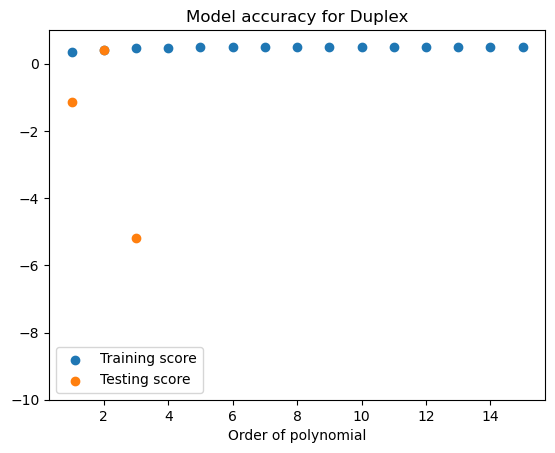

In [31]:
#Create model accuracy of of the training and testing score to obtain the best polynomial order for the equation
X = df_specific_property["completion_year"]
Y = df_specific_property["monthly_rent"]
# split into a training set with 80% of the data, and a testing set of 20%
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, random_state=42)

training = np.zeros(15)
testing = np.zeros(15)
for ord in range(1,16):
    rng = np.random.RandomState(1)
    reg_ord = ord;
    model = LinearRegression(fit_intercept=True).fit(np.vander(X_train,reg_ord+1),Y_train)
    training[ord-1] = model.score(np.vander(X_train,reg_ord+1),Y_train)
    y_pred = model.predict(np.vander(X_test,reg_ord+1))
    testing[ord-1] = r2_score(Y_test,y_pred)

plt.scatter(range(1,16), training, label='Training score')
plt.scatter(range(1,16), testing, label='Testing score')
plt.legend()
plt.xlabel('Order of polynomial')
plt.ylim((-10, 1.))
plt.title('Model accuracy for Duplex');

In [32]:
p2 = np.poly1d(np.polyfit(X, Y, 2))
print("polynomial equation order of 2:\n", p2)
p1 = np.poly1d(np.polyfit(X, Y, 1))
print("polynomial equation order of 1:\n", p1)

print("\nDue to overfiiting calculated by placing value 100 in the polynomial equation order of 2, we wont be taking polynomial order 2 however we will take polynomial order 1")
print("\nThe optimal polynomial order equation for Duplex property types is y = 18.19 x + 993\nwhere x is the number of years since 1980")

polynomial equation order of 2:
        2
12.63 x - 833 x + 1.52e+04
polynomial equation order of 1:
  
18.19 x + 993

Due to overfiiting calculated by placing value 100 in the polynomial equation order of 2, we wont be taking polynomial order 2 however we will take polynomial order 1

The optimal polynomial order equation for Duplex property types is y = 18.19 x + 993
where x is the number of years since 1980


Training score is 0.001
Correlation score is 0.035
Coefficients are [2.632]
Intercept is 1257.306
 
2.632 x + 1257


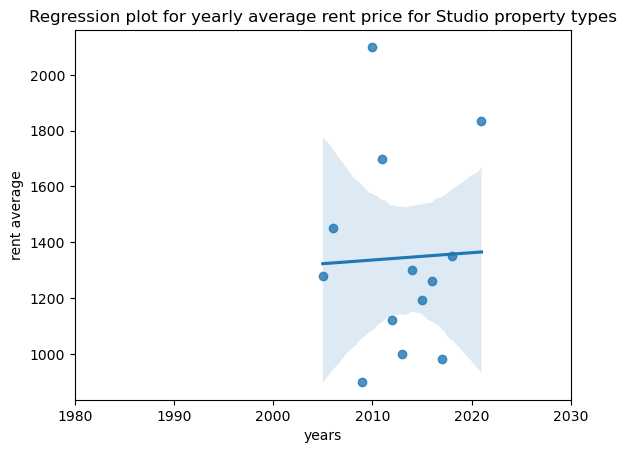

In [33]:
property_types = ['Others', 'Duplex', 'Studio', 'Apartment', 'Service Residence', 'Condominium']
df_specific_property = df_years[df_years["property_type"]=="Studio"]

rent_average = []
years = []
for index in range(0,46):
    
    df_property_years = df_specific_property[df_specific_property["completion_year"] == index]

    rent_list = df_property_years["monthly_rent"].tolist()
    if len(rent_list) != 0:
        rent_average.append(sum(rent_list)/len(rent_list))
        years.append(index)

yearly_rent_average = pd.DataFrame({"rent average": rent_average, "years": years})

X = yearly_rent_average[["years"]]
Y = yearly_rent_average["rent average"]

linear = LinearRegression(fit_intercept=True) # instantatiate the linear regression model
linear.fit(X, Y) # fit the data to the model
training_score = linear.score(X, Y) # calculate rsq for the training set

print("Training score is",np.round(training_score, 3))
print("Correlation score is",np.round(np.sqrt(training_score), 3))
print("Coefficients are",np.round(linear.coef_, 3))
print("Intercept is",np.round(linear.intercept_,3))

sns.regplot(x=X, y=Y)
p1 = np.poly1d(np.polyfit(yearly_rent_average["years"], yearly_rent_average["rent average"], 1))
print(p1)
# Get the current tick locations and labels
X_ticks = [0.,10.,20.,30.,40.,50.]
X_labels =  [0.0, 10.0, 20.0, 30.0, 40.0, 50.0]

# Update the tick labels by adding 1980 to each value to make it return back to its original year
#However x is still number of years from 1980
updated_tick_labels = [str(int(x) + 1980) for x in X_labels]
plt.xticks(X_ticks, updated_tick_labels)
plt.title("Regression plot for yearly average rent price for Studio property types");

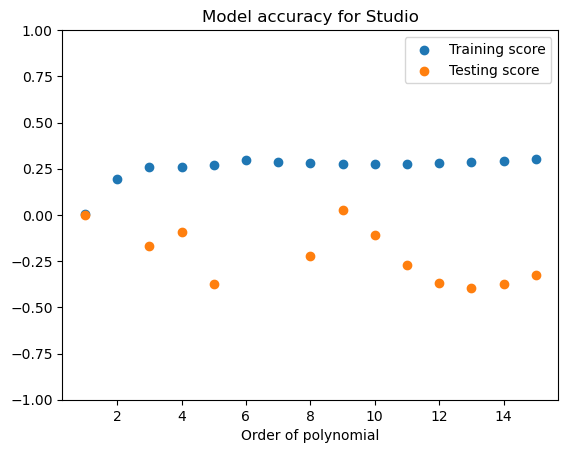

In [34]:
#Create model accuracy of of the training and testing score to obtain the best polynomial order for the equation
X = df_specific_property["completion_year"]
Y = df_specific_property["monthly_rent"]
# split into a training set with 80% of the data, and a testing set of 20%
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, random_state=42)

training = np.zeros(15)
testing = np.zeros(15)
for ord in range(1,16):
    rng = np.random.RandomState(1)
    reg_ord = ord;
    model = LinearRegression(fit_intercept=True).fit(np.vander(X_train,reg_ord+1),Y_train)
    training[ord-1] = model.score(np.vander(X_train,reg_ord+1),Y_train)
    y_pred = model.predict(np.vander(X_test,reg_ord+1))
    testing[ord-1] = r2_score(Y_test,y_pred)

plt.scatter(range(1,16), training, label='Training score')
plt.scatter(range(1,16), testing, label='Testing score')
plt.legend()
plt.xlabel('Order of polynomial')
plt.ylim((-1, 1))
plt.title('Model accuracy for Studio');

In [35]:

p9 = np.poly1d(np.polyfit(X, Y, 9))
print("polynomial equation order of 9:\n", p9)

print("polynomial equation order of 1:\n", p1)


print("\nDue to overfiiting seen when placing 100 into the equation order of 9, we wont be taking polynomial order 9 however will take polynomial order 1\n")
print("The optimal polynomial order equation for Studio property types is\ny = 2.632 x + 1257 where x is the number of years since 1980")



polynomial equation order of 9:
            9          8         7        6             5             4
0.0007755 x - 0.2362 x + 31.85 x - 2496 x + 1.252e+05 x - 4.172e+06 x
              3             2
 + 9.229e+07 x - 1.307e+09 x + 1.075e+10 x - 3.914e+10
polynomial equation order of 1:
  
2.632 x + 1257

Due to overfiiting seen when placing 100 into the equation order of 9, we wont be taking polynomial order 9 however will take polynomial order 1

The optimal polynomial order equation for Studio property types is
y = 2.632 x + 1257 where x is the number of years since 1980


Training score is 0.254
Correlation score is 0.504
Coefficients are [14.988]
Intercept is 946.811
 
14.99 x + 946.8


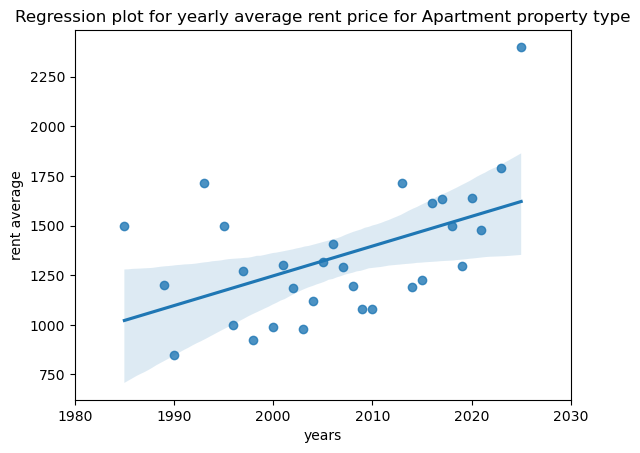

In [36]:
property_types = ['Others', 'Duplex', 'Studio', 'Apartment', 'Service Residence', 'Condominium']
df_specific_property = df_years[df_years["property_type"]=="Apartment"]

rent_average = []
years = []
for index in range(0,46):
    
    df_property_years = df_specific_property[df_specific_property["completion_year"] == index]

    rent_list = df_property_years["monthly_rent"].tolist()
    if len(rent_list) != 0:
        rent_average.append(sum(rent_list)/len(rent_list))
        years.append(index)

yearly_rent_average = pd.DataFrame({"rent average": rent_average, "years": years})

X = yearly_rent_average[["years"]]
Y = yearly_rent_average["rent average"]

linear = LinearRegression(fit_intercept=True) # instantatiate the linear regression model
linear.fit(X, Y) # fit the data to the model
training_score = linear.score(X, Y) # calculate rsq for the training set

print("Training score is",np.round(training_score, 3))
print("Correlation score is",np.round(np.sqrt(training_score), 3))
print("Coefficients are",np.round(linear.coef_, 3))
print("Intercept is",np.round(linear.intercept_,3))

sns.regplot(x=X, y=Y)
p1 = np.poly1d(np.polyfit(yearly_rent_average["years"], yearly_rent_average["rent average"], 1))
print(p1)
# Get the current tick locations and labels
X_ticks = [0.,10.,20.,30.,40.,50.]
X_labels =  [0.0, 10.0, 20.0, 30.0, 40.0, 50.0]

# Update the tick labels by adding 1980 to each value to make it return back to its original year
#However x is still number of years from 1980
updated_tick_labels = [str(int(x) + 1980) for x in X_labels]
plt.xticks(X_ticks, updated_tick_labels)
plt.title("Regression plot for yearly average rent price for Apartment property type");

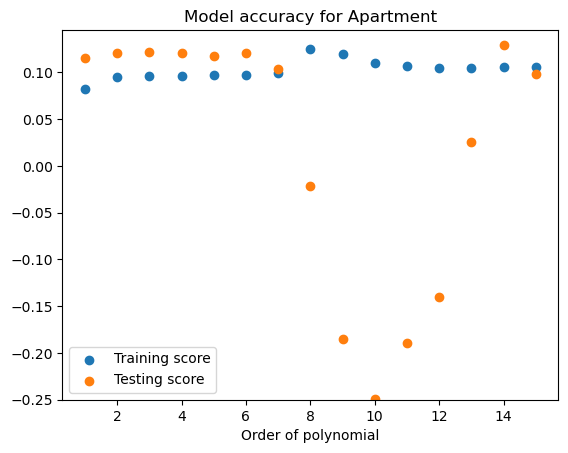

In [37]:
#Create model accuracy of of the training and testing score to obtain the best polynomial order for the equation
X = df_specific_property["completion_year"]
Y = df_specific_property["monthly_rent"]
# split into a training set with 80% of the data, and a testing set of 20%
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, random_state=42)

training = np.zeros(15)
testing = np.zeros(15)
for ord in range(1,16):
    rng = np.random.RandomState(1)
    reg_ord = ord;
    model = LinearRegression(fit_intercept=True).fit(np.vander(X_train,reg_ord+1),Y_train)
    training[ord-1] = model.score(np.vander(X_train,reg_ord+1),Y_train)
    y_pred = model.predict(np.vander(X_test,reg_ord+1))
    testing[ord-1] = r2_score(Y_test,y_pred)

plt.scatter(range(1,16), training, label='Training score')
plt.scatter(range(1,16), testing, label='Testing score')
plt.legend()
plt.xlabel('Order of polynomial')
plt.ylim((-0.25, 0.145))
plt.title('Model accuracy for Apartment');

In [38]:
p14 = np.poly1d(np.polyfit(X, Y, 14))
print("polynomial equation order of 14:\n", p14)
print("")
p2 = np.poly1d(np.polyfit(X, Y, 2))
print("polynomial equation order of 2:\n", p2)

print("\nDue to overfiiting seen when placing 100 into equation order of 14, we wont be taking polynomial order 14 however will take polynomial order 2\n")
print("The optimal polynomial order equation for Apartment property types is y = 0.7325 x^2 - 26.04 x + 1391\nwhere x is the number of years since 1980")

polynomial equation order of 14:
             14             13             12             11
-1.043e-12 x  + 3.871e-10 x  - 6.545e-08 x  + 6.673e-06 x 
              10          9          8      7         6        5
 - 0.0004576 x  + 0.0223 x - 0.7946 x + 21 x - 412.7 x + 5986 x
              4             3             2
 - 6.291e+04 x + 4.629e+05 x - 2.245e+06 x + 6.389e+06 x - 7.993e+06

polynomial equation order of 2:
         2
0.7325 x - 26.04 x + 1391

Due to overfiiting seen when placing 100 into equation order of 14, we wont be taking polynomial order 14 however will take polynomial order 2

The optimal polynomial order equation for Apartment property types is y = 0.7325 x^2 - 26.04 x + 1391
where x is the number of years since 1980


Training score is 0.072
Correlation score is 0.268
Coefficients are [14.559]
Intercept is 1379.033
 
14.56 x + 1379


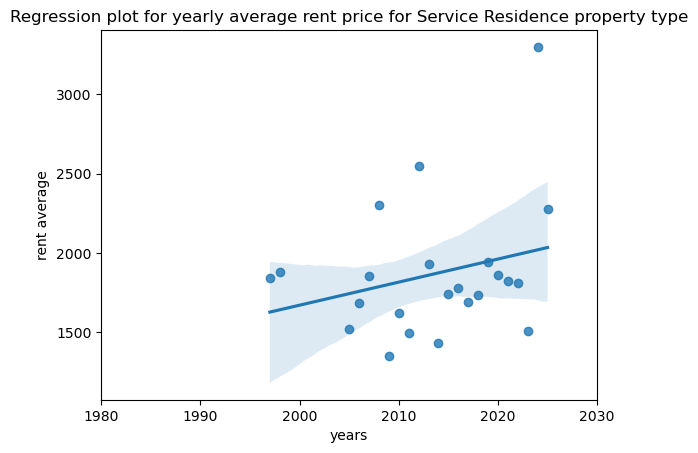

In [39]:
property_types = ['Others', 'Duplex', 'Studio', 'Apartment', 'Service Residence', 'Condominium']
df_specific_property = df_years[df_years["property_type"]=="Service Residence"]

rent_average = []
years = []
for index in range(0,46):
    
    df_property_years = df_specific_property[df_specific_property["completion_year"] == index]

    rent_list = df_property_years["monthly_rent"].tolist()
    if len(rent_list) != 0:
        rent_average.append(sum(rent_list)/len(rent_list))
        years.append(index)

yearly_rent_average = pd.DataFrame({"rent average": rent_average, "years": years})

X = yearly_rent_average[["years"]]
Y = yearly_rent_average["rent average"]

linear = LinearRegression(fit_intercept=True) # instantatiate the linear regression model
linear.fit(X, Y) # fit the data to the model
training_score = linear.score(X, Y) # calculate rsq for the training set

print("Training score is",np.round(training_score, 3))
print("Correlation score is",np.round(np.sqrt(training_score), 3))
print("Coefficients are",np.round(linear.coef_, 3))
print("Intercept is",np.round(linear.intercept_,3))

sns.regplot(x=X, y=Y)
p1 = np.poly1d(np.polyfit(yearly_rent_average["years"], yearly_rent_average["rent average"], 1))
print(p1)
# Get the current tick locations and labels
X_ticks = [0.,10.,20.,30.,40.,50.]
X_labels =  [0.0, 10.0, 20.0, 30.0, 40.0, 50.0]

# Update the tick labels by adding 1980 to each value to make it return back to its original year
#However x is still number of years from 1980
updated_tick_labels = [str(int(x) + 1980) for x in X_labels]
plt.xticks(X_ticks, updated_tick_labels)
plt.title("Regression plot for yearly average rent price for Service Residence property type");

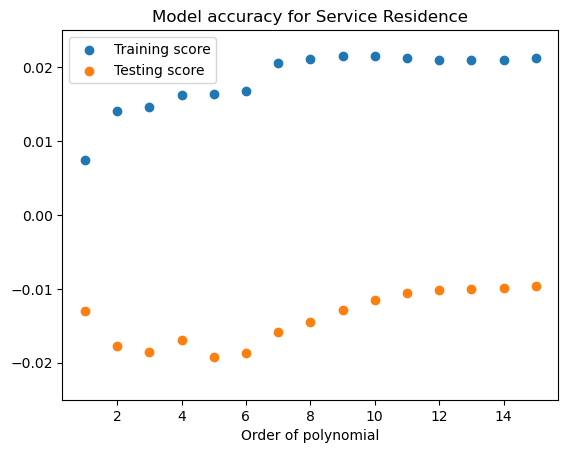

In [40]:
#Create model accuracy of of the training and testing score to obtain the best polynomial order for the equation
X = df_specific_property["completion_year"]
Y = df_specific_property["monthly_rent"]
# split into a training set with 80% of the data, and a testing set of 20%
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, random_state=42)

training = np.zeros(15)
testing = np.zeros(15)
for ord in range(1,16):
    rng = np.random.RandomState(1)
    reg_ord = ord;
    model = LinearRegression(fit_intercept=True).fit(np.vander(X_train,reg_ord+1),Y_train)
    training[ord-1] = model.score(np.vander(X_train,reg_ord+1),Y_train)
    y_pred = model.predict(np.vander(X_test,reg_ord+1))
    testing[ord-1] = r2_score(Y_test,y_pred)

plt.scatter(range(1,16), training, label='Training score')
plt.scatter(range(1,16), testing, label='Testing score')
plt.legend()
plt.xlabel('Order of polynomial')
plt.ylim((-0.025, 0.025))
plt.title('Model accuracy for Service Residence');

In [41]:
p15 = np.poly1d(np.polyfit(X, Y, 15))
print("polynomial equation order of 15:\n", p15)
print("")
p1 = np.poly1d(np.polyfit(X, Y, 1))
print("polynomial equation order of 1:\n", p1)
print("\nDue to overfiiting seen by placing x as 100 in equation order of 15, we wont be taking polynomial order 15 however will take polynomial order 1\n")
print("The optimal polynomial order equation for Service residence property types is y = 10.41 x + 1376\nwhere x is the number of years since 1980")

polynomial equation order of 15:
             15             14             13             12
-7.435e-14 x  + 2.149e-11 x  - 2.491e-09 x  + 1.341e-07 x 
              11             10            9          8         7
 - 1.769e-06 x  - 0.0001545 x  + 0.005698 x + 0.1533 x - 12.01 x
          6             5             4             3             2
 + 2.634 x + 2.041e+04 x - 8.712e+05 x + 1.874e+07 x - 2.329e+08 x + 1.599e+09 x - 4.717e+09

polynomial equation order of 1:
  
10.41 x + 1376

Due to overfiiting seen by placing x as 100 in equation order of 15, we wont be taking polynomial order 15 however will take polynomial order 1

The optimal polynomial order equation for Service residence property types is y = 10.41 x + 1376
where x is the number of years since 1980


C:\Users\rushi\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py:3526: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


Training score is 0.082
Correlation score is 0.287
Coefficients are [8.721]
Intercept is 1516.611
 
8.721 x + 1517


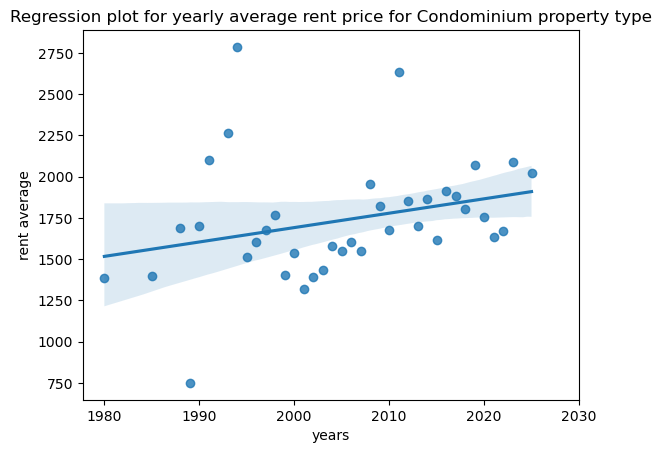

In [42]:
property_types = ['Others', 'Duplex', 'Studio', 'Apartment', 'Service Residence', 'Condominium']
df_specific_property = df_years[df_years["property_type"]=="Condominium"]

rent_average = []
years = []
for index in range(0,46):
    
    df_property_years = df_specific_property[df_specific_property["completion_year"] == index]

    rent_list = df_property_years["monthly_rent"].tolist()
    if len(rent_list) != 0:
        rent_average.append(sum(rent_list)/len(rent_list))
        years.append(index)

yearly_rent_average = pd.DataFrame({"rent average": rent_average, "years": years})

X = yearly_rent_average[["years"]]
Y = yearly_rent_average["rent average"]

linear = LinearRegression(fit_intercept=True) # instantatiate the linear regression model
linear.fit(X, Y) # fit the data to the model
training_score = linear.score(X, Y) # calculate rsq for the training set

print("Training score is",np.round(training_score, 3))
print("Correlation score is",np.round(np.sqrt(training_score), 3))
print("Coefficients are",np.round(linear.coef_, 3))
print("Intercept is",np.round(linear.intercept_,3))

sns.regplot(x=X, y=Y)
p1 = np.poly1d(np.polyfit(yearly_rent_average["years"], yearly_rent_average["rent average"], 1))
print(p1)
# Get the current tick locations and labels
X_ticks = [0.,10.,20.,30.,40.,50.]
X_labels =  [0.0, 10.0, 20.0, 30.0, 40.0, 50.0]

# Update the tick labels by adding 1980 to each value to make it return back to its original year
#However x is still number of years from 1980
updated_tick_labels = [str(int(x) + 1980) for x in X_labels]
plt.xticks(X_ticks, updated_tick_labels)
plt.title("Regression plot for yearly average rent price for Condominium property type");

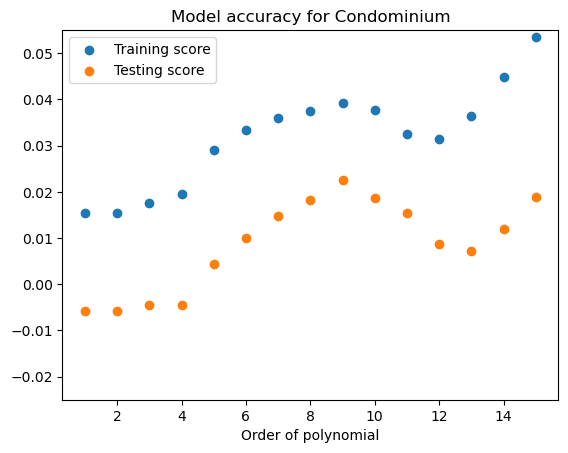

In [43]:
#Create model accuracy of of the training and testing score to obtain the best polynomial order for the equation
X = df_specific_property["completion_year"]
Y = df_specific_property["monthly_rent"]
# split into a training set with 80% of the data, and a testing set of 20%
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, random_state=42)

training = np.zeros(15)
testing = np.zeros(15)
for ord in range(1,16):
    rng = np.random.RandomState(1)
    reg_ord = ord;
    model = LinearRegression(fit_intercept=True).fit(np.vander(X_train,reg_ord+1),Y_train)
    training[ord-1] = model.score(np.vander(X_train,reg_ord+1),Y_train)
    y_pred = model.predict(np.vander(X_test,reg_ord+1))
    testing[ord-1] = r2_score(Y_test,y_pred)

plt.scatter(range(1,16), training, label='Training score')
plt.scatter(range(1,16), testing, label='Testing score')
plt.legend()
plt.xlabel('Order of polynomial')
plt.ylim((-0.025, 0.055))
plt.title('Model accuracy for Condominium');

In [44]:
p9 = np.poly1d(np.polyfit(X, Y, 9))
print("polynomial equation order of 9:\n", p9)
print("")
print("polynomial equation order of 1:\n", p1)
print("\nDue to overfiiting seen when placing x=100 in equation order 9, we wont be taking polynomial order 9 however we will take polynomial order 1\n")
print("The optimal polynomial order equation for Condominium property types is y = 8.721 x + 1517\nwhere x is the number of years since 1980")




polynomial equation order of 9:
           9             8             7           6          5
1.74e-08 x - 3.637e-06 x + 0.0003173 x - 0.01491 x + 0.4051 x
          4         3         2
 - 6.323 x + 52.45 x - 189.3 x + 185.3 x + 1393

polynomial equation order of 1:
  
8.721 x + 1517

Due to overfiiting seen when placing x=100 in equation order 9, we wont be taking polynomial order 9 however we will take polynomial order 1

The optimal polynomial order equation for Condominium property types is y = 8.721 x + 1517
where x is the number of years since 1980


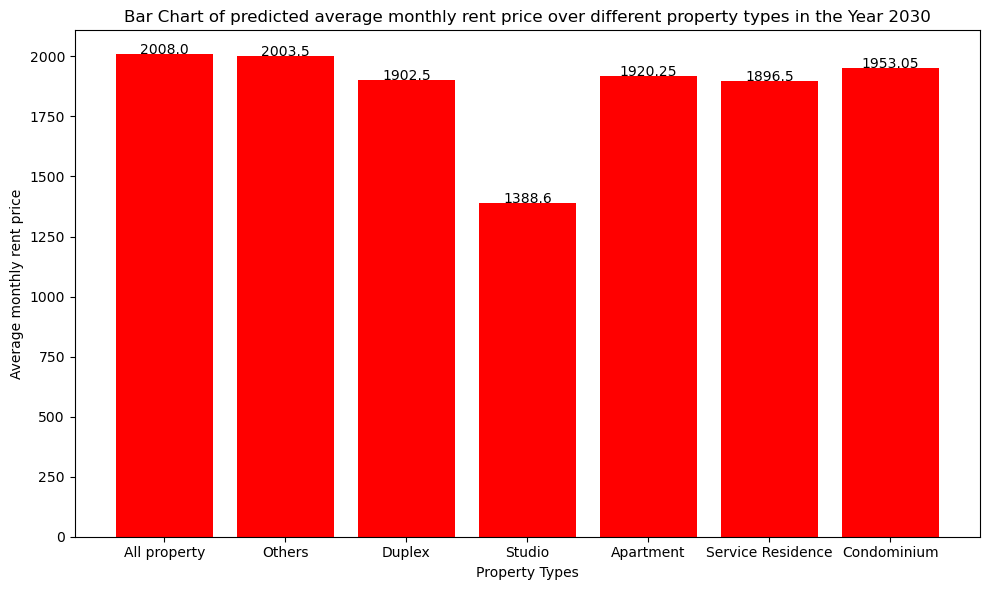

In [45]:
#Get the Y values which is the average monthly rent for each property type in the X values by placing 50 in the obtained optimal equations above because 2030-1980= 50
X = ["All property", "Others", "Duplex", "Studio", "Apartment", "Service Residence", "Condominium"]
Y = [2008, 2003.5, 1902.5, 1388.6, 1920.25, 1896.5, 1953.05]

# Create bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(X, Y, color='red')

# Add leabbeling
plt.xlabel('Property Types')
plt.ylabel('Average monthly rent price')
plt.title('Bar Chart of predicted average monthly rent price over different property types in the Year 2030')


# Add value on top of each bar to see better
for bar in bars:
    value = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, value, round(value, 2), ha='center')

# Show plot
plt.tight_layout()
plt.show()